In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# From Chart Data.csv


In [4]:
content_chart_data = pd.read_csv("Content 2024-07-07_2024-10-05 Musimorph\Chart data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\User\AppData\Local\Temp\ipykernel_8668\3199091410.py:1: SyntaxWarning: invalid escape sequence '\C'
  content_chart_data = pd.read_csv("Content 2024-07-07_2024-10-05 Musimorph\Chart data.csv")


In [5]:
content_chart_data.head()

,Date,Content,Video title,Video publish time,Subscribers
0,2024-07-07,-pQYwDUKW6w,Sound object T shape to stepped hollow,"Jul 27, 2024",0
1,2024-07-08,-pQYwDUKW6w,Sound object T shape to stepped hollow,"Jul 27, 2024",0
2,2024-07-09,-pQYwDUKW6w,Sound object T shape to stepped hollow,"Jul 27, 2024",0
3,2024-07-10,-pQYwDUKW6w,Sound object T shape to stepped hollow,"Jul 27, 2024",0
4,2024-07-11,-pQYwDUKW6w,Sound object T shape to stepped hollow,"Jul 27, 2024",0


In [6]:
content_chart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                450 non-null    object
 1   Content             450 non-null    object
 2   Video title         450 non-null    object
 3   Video publish time  450 non-null    object
 4   Subscribers         450 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.7+ KB


<Axes: xlabel='Video title'>

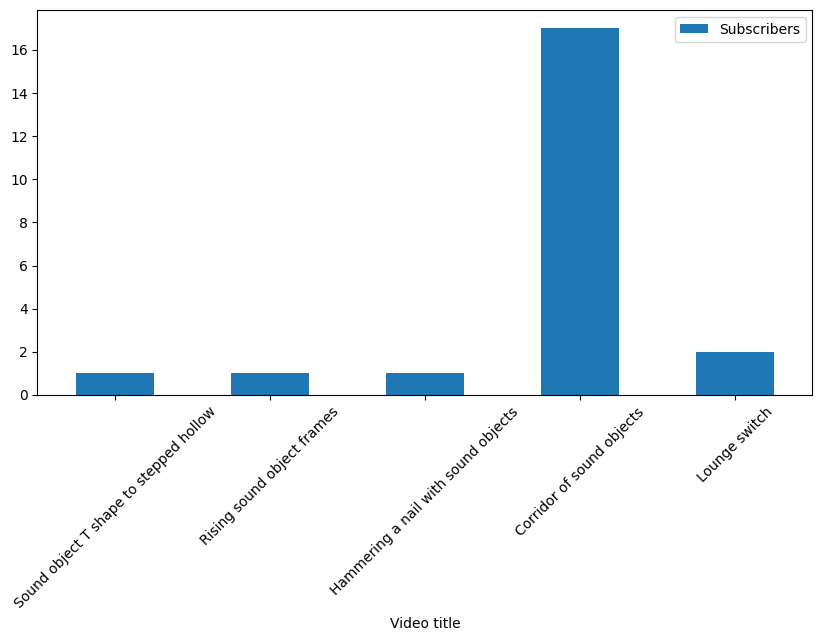

In [23]:
#I want to group by content and sum of subscribers but want video title to be displayed as well so add bar plot with label of video title

content_chart_data.groupby('Content').agg({'Subscribers':'sum', 'Video title':'first'}).plot(kind='bar', figsize=(10,5), x='Video title', y='Subscribers', rot=45)


<Axes: xlabel='Date'>

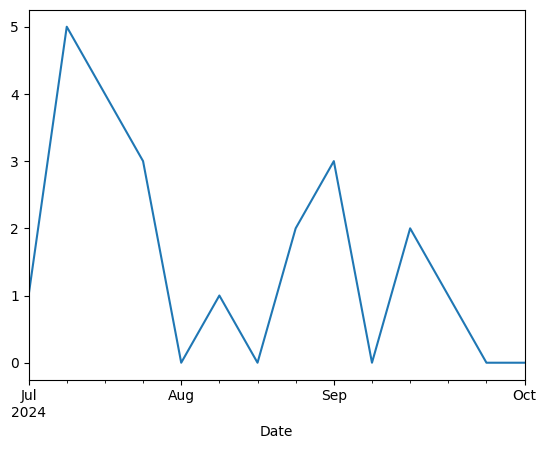

In [16]:
#ploting the date and subscribers added on weekly basis
content_chart_data['Date'] = pd.to_datetime(content_chart_data['Date'])
content_chart_data.set_index('Date', inplace=True)
content_chart_data['Subscribers'].resample('W').sum().plot()



# EDA for Table Data.csv

In [24]:
table_data = pd.read_csv("Content 2024-07-07_2024-10-05 Musimorph\Table data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\User\AppData\Local\Temp\ipykernel_8668\1752095152.py:1: SyntaxWarning: invalid escape sequence '\T'
  table_data = pd.read_csv("Content 2024-07-07_2024-10-05 Musimorph\Table data.csv")


In [25]:
table_data.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Average view duration,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,22396,138.1732,48,0:00:22,220750,4.72
1,ilwP8vkZ0p4,Corridor of sound objects,"Feb 14, 2024",3776,20.1460,17,0:00:19,35108,8.09
2,lTjB9oc_60w,Lounge switch,"Sep 6, 2024",200,0.6921,2,0:00:12,3661,2.90
3,-pQYwDUKW6w,Sound object T shape to stepped hollow,"Jul 27, 2024",204,1.2106,1,0:00:21,2406,3.33
4,2U4-0bPW8rI,Rising sound object frames,"Jul 28, 2024",125,0.4395,1,0:00:12,1217,2.55


In [26]:
#removing first row as it is not needed
table_data = table_data.drop(0)


In [27]:
table_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             150 non-null    object 
 1   Video title                         150 non-null    object 
 2   Video publish time                  150 non-null    object 
 3   Views                               150 non-null    int64  
 4   Watch time (hours)                  150 non-null    float64
 5   Subscribers                         150 non-null    int64  
 6   Average view duration               150 non-null    object 
 7   Impressions                         150 non-null    int64  
 8   Impressions click-through rate (%)  150 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 10.7+ KB


In [31]:
#changing the video published date to datetime
table_data['Video publish time'] = pd.to_datetime(table_data['Video publish time'])

In [39]:
table_data.groupby('Content')['Subscribers'].sum()

Content
 -TNy_4h19mw    0
 -cswUVHXMcM    0
 -pQYwDUKW6w    1
02AwFSwk3zs     0
0xz_RRk4z_o     0
               ..
vYkPgPuGwEI     0
xIX3xMjZhuw     0
yIbiM0MgheE     1
yT0Ip6g26aY     0
z3zBfRZpwPA     1
Name: Subscribers, Length: 150, dtype: int64

<Axes: xlabel='Video publish time'>

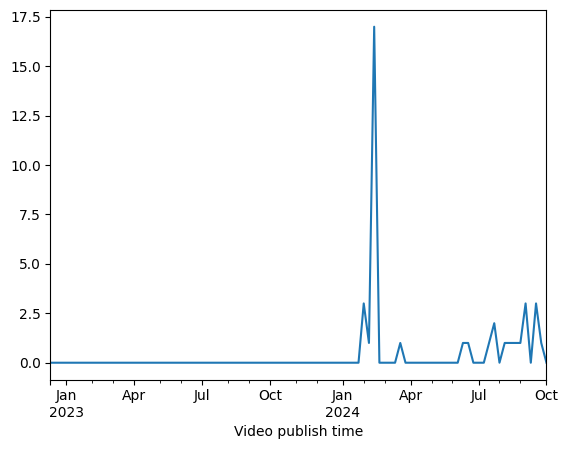

In [43]:
#plotting the subscribers added by each content on weekly basis
table_data.set_index('Video publish time', inplace=True)
table_data['Subscribers'].resample('W').sum().plot()


<Axes: xlabel='Video publish time'>

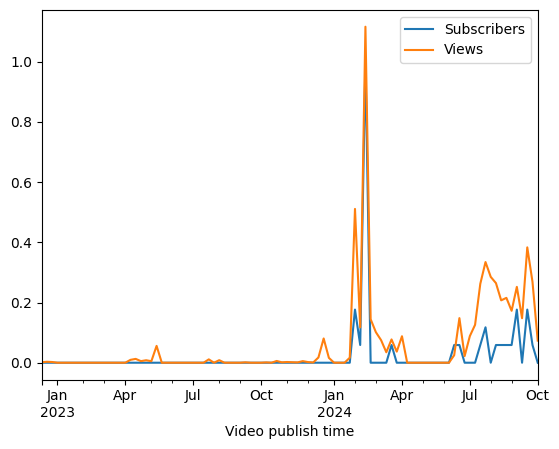

In [58]:
#plotting the views and subscribers added by each content on weekly basis, show legend as wel, if possible add data label on the plot
#standard normalization is needed as views and subscribers are in different scales
import sklearn.preprocessing as preprocessing

#normalizing the subscribers and views
min_max_scaler = preprocessing.MinMaxScaler()
table_data['Subscribers'] = min_max_scaler.fit_transform(table_data['Subscribers'].values.reshape(-1,1))
table_data['Views'] = min_max_scaler.fit_transform(table_data['Views'].values.reshape(-1,1))

table_data[['Subscribers', 'Views']].resample('W').sum().plot()
